In [1]:
import os
import sys

SRC_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

if SRC_DIR not in sys.path:
    sys.path.insert(0, SRC_DIR)  # put src at the FRONT of sys.path

from feature_extractor.options import CHANNEL_PICK_OPTIONS


## Produce Layout Plots of All Channel Pick Options

Saving fig to ./generated/plt-channel_pick_options-minimal_frontal.png
Saving fig to ./generated/plt-channel_pick_options-minimal_frontal_parietal.png
Saving fig to ./generated/plt-channel_pick_options-minimal_frontopolar.png
Saving fig to ./generated/plt-channel_pick_options-minimal_temporal_augmented.png
Saving fig to ./generated/plt-channel_pick_options-balanced_classic_6.png
Saving fig to ./generated/plt-channel_pick_options-balanced_temporal.png
Saving fig to ./generated/plt-channel_pick_options-balanced_data_driven_5.png
Saving fig to ./generated/plt-channel_pick_options-optimized_gold_standard_8.png
Saving fig to ./generated/plt-channel_pick_options-optimized_lateral_mix.png
Saving fig to ./generated/plt-channel_pick_options-optimized_relief_nmi.png
Saving fig to ./generated/plt-channel_pick_options-frontal_full_10.png
Saving fig to ./generated/plt-channel_pick_options-standard_32.png


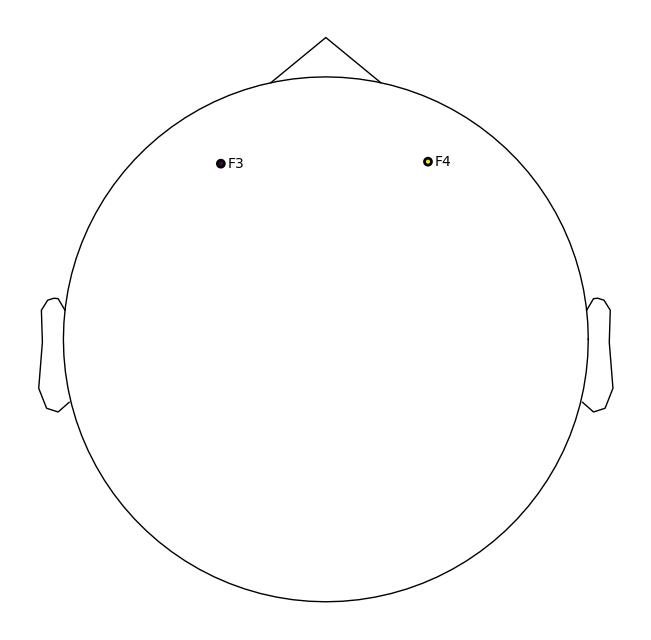

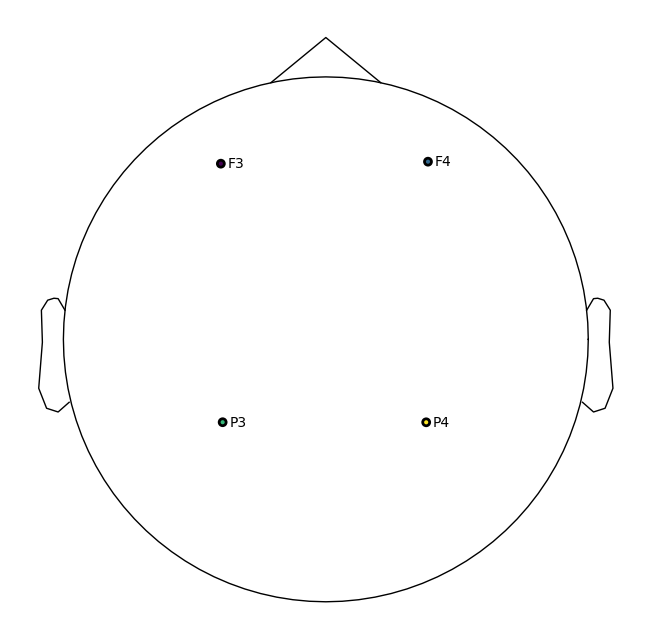

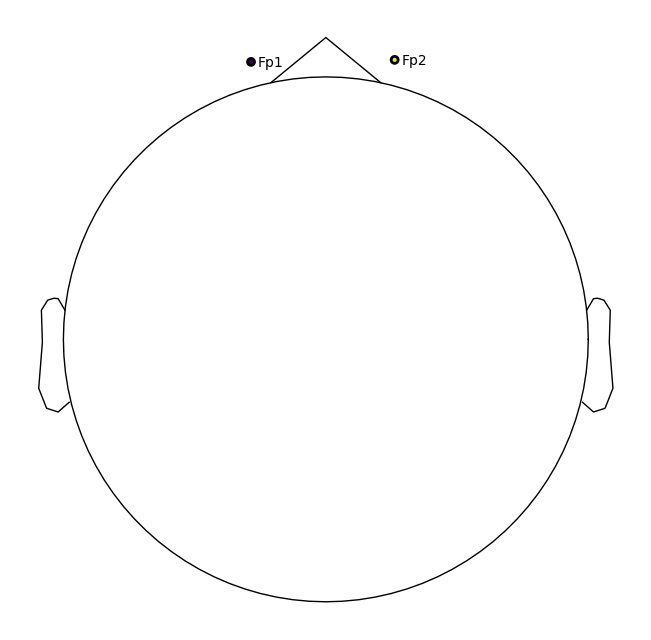

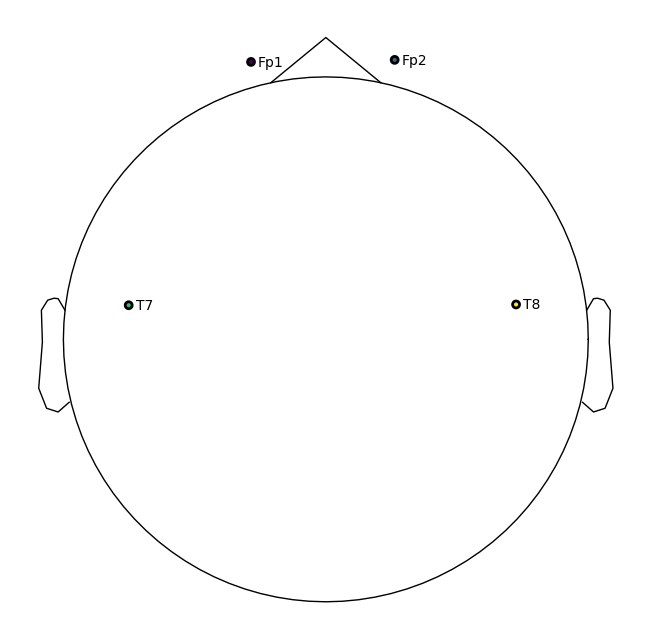

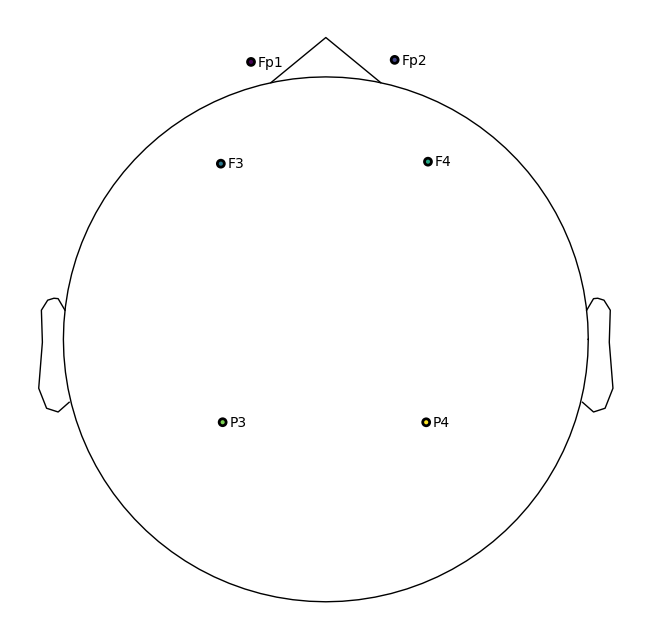

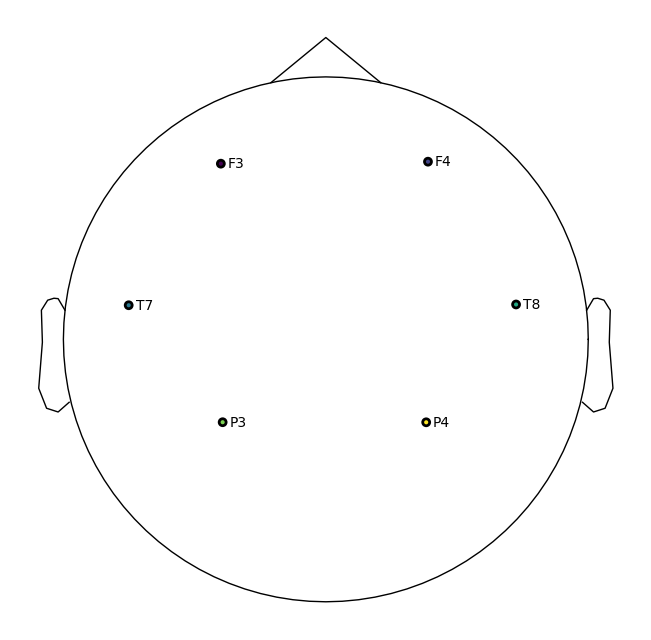

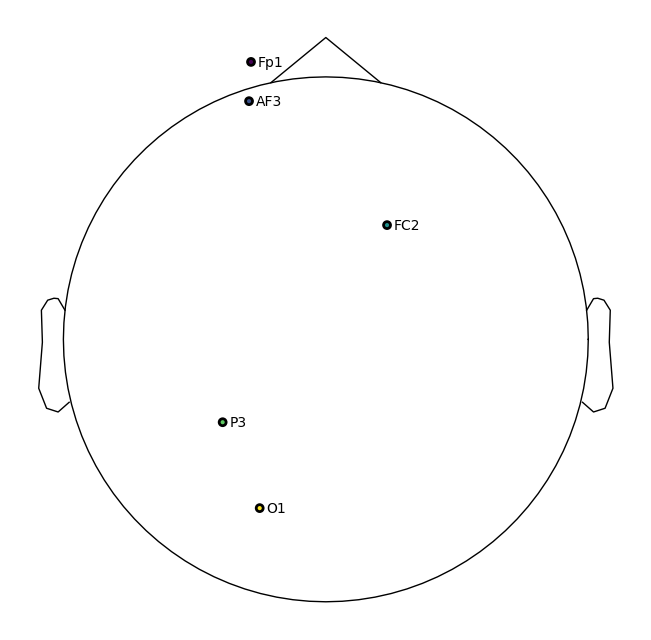

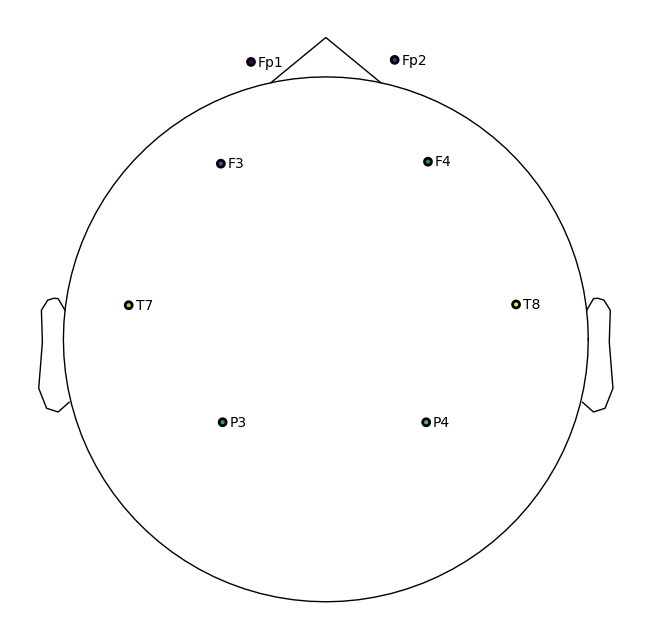

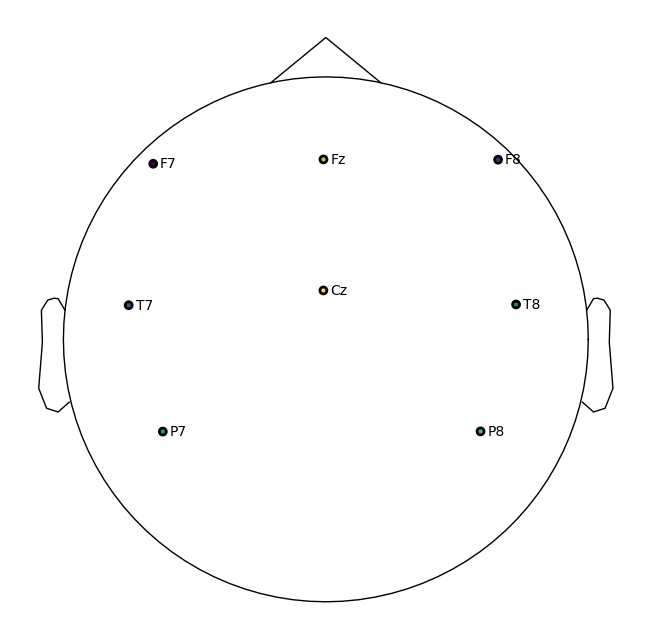

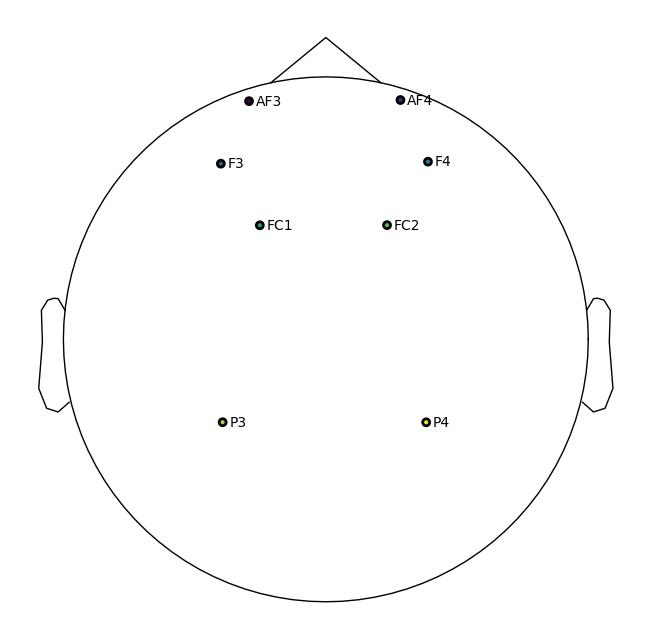

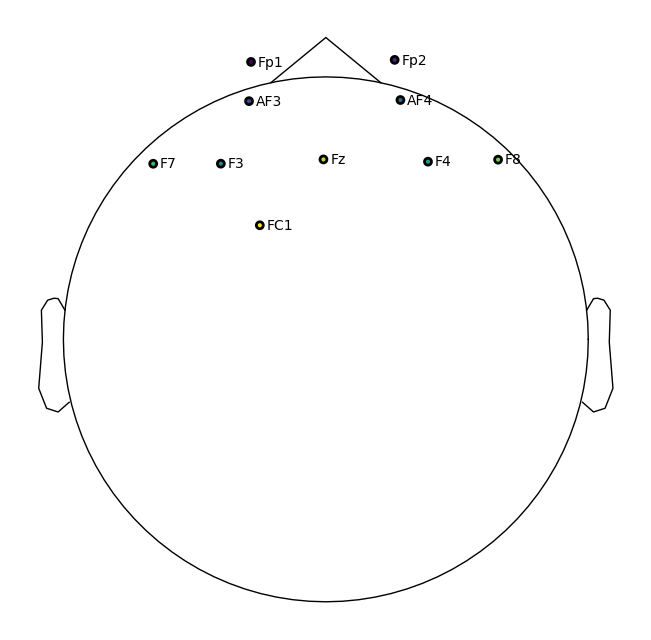

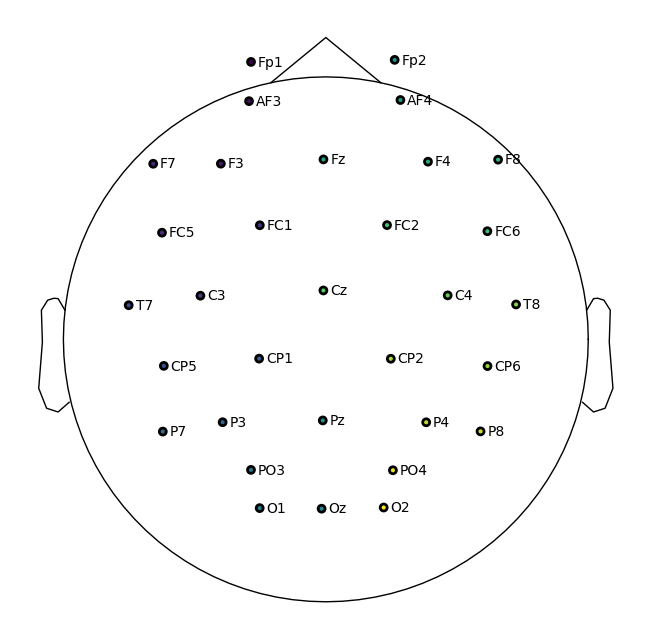

In [2]:
import mne
from mne.channels import make_standard_montage
import matplotlib.pyplot as plt

def plot_channel_pick_options(option_list, montage_name: str = "standard_1020"):
    """
    Plot one sensor layout per ChannelPickOption in option_list.

    Parameters
    ----------
    option_list : iterable of ChannelPickOption
        Your CHANNEL_PICK_OPTIONS (list-like).
    montage_name : str
        Name of the MNE standard montage to use.
    """
    montage = make_standard_montage(montage_name)

    for opt in option_list:  # CHANNEL_PICK_OPTIONS is list-like
        ch_names = list(opt.channel_pick)

        # Minimal Info object just for plotting these channels
        info = mne.create_info(
            ch_names=ch_names,
            sfreq=100.0,       # arbitrary; not used for plotting
            ch_types="eeg",
        )
        info.set_montage(montage, on_missing="ignore")

        # one group (and hence one color) per channel so it isn't all black
        indices = list(range(len(ch_names)))
        ch_groups = [[idx] for idx in indices]

        fig = mne.viz.plot_sensors(
            info,
            kind="topomap",
            ch_type="eeg",
            show_names=True,
            ch_groups=ch_groups,   # enables colored points
            title=opt.name,        # figure title per doc
            to_sphere=True,
            pointsize=25,
            linewidth=2,
            show=False,
        )
        print(f"Saving fig to ./generated/plt-channel_pick_options-{opt.name}.png")
        fig.savefig(f"./generated/plt-channel_pick_options-{opt.name}.png")

_ = plot_channel_pick_options(CHANNEL_PICK_OPTIONS)


## Produce Titled Layout Plots of All Channel Pick Options and Combine them into a GIF

In [3]:
import os

import mne
import matplotlib.pyplot as plt
from mne.channels import make_standard_montage
import imageio.v2 as imageio  # imageio.v2 to avoid deprecation warnings


def plot_and_gif(
    option_list,
    montage_name: str = "standard_1020",
    out_dir: str = "generated",
    gif_name: str = "generated/plt-channel_pick_options.gif",
    duration: float = 1.0,   # seconds PER OPTION
    base_fps: int = 5,       # internal fps used when constructing the GIF
):
    """
    Generate plots for each ChannelPickOption and combine them into a GIF.

    Parameters
    ----------
    option_list : iterable of ChannelPickOption
        E.g. CHANNEL_PICK_OPTIONS or CHANNEL_PICK_OPTIONS.options
    montage_name : str
        Standard montage for sensor positions (e.g. 'standard_1020').
    out_dir : str
        Directory to save PNG frames.
    gif_name : str
        Output GIF filename.
    duration : float
        Approximate seconds to show EACH option in the GIF.
    base_fps : int
        Internal FPS for the GIF; higher = smoother but larger file.
    """

    os.makedirs(out_dir, exist_ok=True)
    montage = make_standard_montage(montage_name)
    frame_paths = []

    # ---------- make one PNG per option ----------
    for idx, opt in enumerate(option_list):
        ch_names = list(opt.channel_pick)

        info = mne.create_info(
            ch_names=ch_names,
            sfreq=100.0,
            ch_types="eeg",
        )
        info.set_montage(montage, on_missing="ignore")

        # color each channel separately
        ch_groups = [[i] for i in range(len(ch_names))]

        # create figure/axes ourselves, then pass axes to plot_sensors
        fig, ax = plt.subplots(figsize=(4, 4))

        mne.viz.plot_sensors(
            info,
            kind="topomap",
            ch_type="eeg",
            show_names=True,
            ch_groups=ch_groups,
            to_sphere=True,
            pointsize=25,
            linewidth=2,
            axes=ax,
            show=False,
        )

        # TITLE: set on the axes so it's guaranteed to be inside the canvas
        ax.set_title(opt.name, fontsize=14)

        # save without tight cropping so the title is not cut off
        frame_path = os.path.join(out_dir, f"plt-channel_pick_options_titled-{opt.name}.png")
        fig.savefig(frame_path, dpi=150, bbox_inches=None)
        plt.close(fig)

        frame_paths.append(frame_path)

    # ---------- build GIF with repeated frames for speed control ----------
    # Approx. how many frames per option:
    frames_per_option = max(1, int(duration * base_fps))

    gif_frames = []
    for path in frame_paths:
        img = imageio.imread(path)
        gif_frames.extend([img] * frames_per_option)

    # Now each option appears for ~duration seconds: frames_per_option / base_fps
    imageio.mimsave(gif_name, gif_frames, fps=base_fps)

    print(f"GIF created: {gif_name}")
    print(f"Frames stored in: {out_dir}")


# Example usage:
plot_and_gif(CHANNEL_PICK_OPTIONS)            # if list-like
# plot_and_gif(CHANNEL_PICK_OPTIONS.options)    # if you want .options specifically


GIF created: generated/plt-channel_pick_options.gif
Frames stored in: generated
